# Overview of Dog Puzzle
Scrabble Squares is a card puzzle developed by b.dazzle.  The puzzle consists of 9 cards each with 4 objects on the edges of each card.  Each of the four objects has a matching half.  The goal of the puzzle is to arrange the cards in a 3x3 grid, where all edges match (constraints).  

# Odds and probability

For each locaction in the 3x3 grid, each card can be rotated with four possible rotations.  Therefore for a single location there are 4^9 possibilities.  Given the 9 locations in the 3x3 matrix there are 9! possibilities.  In total there are over 95 billion possible options to solve the puzzle

However, if you assume that the center card in the 3x3 matrix cannot be rotated (a rotation of the center card will only rotate the entire 3x3 solution). The number of options for each location is 4^8, saving over 71 billion possibilities.

In [127]:
import math
print('Options assuming all can be rotated: ')
print(math.factorial(9)*(4.**9))
print('Options assuming the center card cannot be rotated: ')
print(math.factorial(9)*(4.**8))

Options assuming all can be rotated: 
95126814720.0
Options assuming the center card cannot be rotated: 
23781703680.0


# Define assumptions and definitions - dog breeds and orientation

An example of the dog puzzle card is shown below.  There are four dog types - Cocker Spaniel, German Shepards, Shar Pei, and Dalmation.  We have defined those dog breeds with labels [c, g, s, d].  Each dog has a head and tail.  The head is defined as 1 and tail as 2.  

Each card is labeled via clockwise labeling starting from the top.  For the example below the card is defined as [g2, s2, c1, d1].  There is a corresponding orientation matrix that tracks and records the rotation of each card.  All rotations are clockwise and in steps of 90 degrees.  So an orientation of 2 is n * 90 deg = 2*90 deg = 180 deg clockwise rotation 

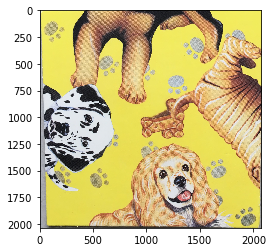

In [128]:
# example puzzle card
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread('dog1.jpg'))
plt.show()

In [129]:
import numpy as np

# pre-allocate constants and define game 
SOLUTION = np.zeros([3,3],dtype=int)
ORIENTATION = np.zeros([3,3],dtype=int)
debug = False

cards = {1: ['g2','s2','c1','d1'],
         2: ['c1','s2','g1','d1'],
         3: ['c2','s1','g2','d2'],
         4: ['g2','s1','c1','d2'],
         5: ['g2','s1','d2','s2'],
         6: ['g1','d2','c1','g2'],
         7: ['g2','s1','c2','d2'],
         8: ['d2','s2','g1','c2'],
         9: ['d1','s1','c1','c2']}
k = cards.keys()
direction = [(1,1),(0,1),(0,2),(1,2),(2,2),(2,1),(2,0),(1,0),(0,0)]
counter = np.zeros(9,dtype=int)


In [130]:
def card_check(loc,card,orient,SOLUTION,ORIENTATION):
    # function to check if a new card and orientation, works given the other cards on the board. 
    # this checks for cards on all sizes and ensures the dog breed and head/tail orientation is preserved
    # function returns True if solution works, False if it does not
    
    if loc[1]-1 >= 0 and SOLUTION[loc[0],loc[1]-1] != 0: # check left
        
        check_card = cards[SOLUTION[loc[0],loc[1]-1]] # get card
        check_card = np.roll(check_card,ORIENTATION[[loc[0]],loc[1]-1]) # rotate it
        
        if check_card[1][0] == np.roll(cards[card],orient)[3][0] and check_card[1][1] != np.roll(cards[card],orient)[3][1]: 
            if debug is True: print('check left found')
            # MATCH!
        else:  return False
        
    if loc[1]+1 < 3 and SOLUTION[loc[0],loc[1]+1] != 0: # check right
        
        check_card = cards[SOLUTION[loc[0],loc[1]+1]]
        check_card = np.roll(check_card,ORIENTATION[[loc[0]],loc[1]+1])
        
        if check_card[3][0] == np.roll(cards[card],orient)[1][0] and check_card[3][1] != np.roll(cards[card],orient)[1][1]: 
            if debug is True: print('check right found')
            # MATCH!
        else:  return False
        
    if loc[0]-1 >= 0 and SOLUTION[loc[0]-1,loc[1]] != 0: # check up
        check_card = cards[SOLUTION[loc[0]-1,loc[1]]]
        check_card = np.roll(check_card,ORIENTATION[[loc[0]-1],loc[1]])
        
        if check_card[2][0] == np.roll(cards[card],orient)[0][0] and check_card[2][1] != np.roll(cards[card],orient)[0][1]: 
            if debug is True: print('check up found')
            # MATCH!
        else:  return False
        
    if loc[0]+1 < 3 and SOLUTION[loc[0]+1,loc[1]] != 0: # check down
        check_card = cards[SOLUTION[loc[0]+1,loc[1]]]
        check_card = np.roll(check_card,ORIENTATION[[loc[0]+1],loc[1]])
        
        if check_card[0][0] == np.roll(cards[card],orient)[2][0] and check_card[0][1] != np.roll(cards[card],orient)[2][1]: 
            if debug is True: print('check down found')
            # MATCH!
        else:  return False

    return True


In [131]:
import pickle

def solveit(location):
    # Recursive function
    # check to see if the puzzle is solved
    if location < len(direction):
        if debug is True: print(), print('location: ',location)
        available = list(k - np.ndarray.flatten(SOLUTION))

        # check to see if cards are available to pick
        while len(available) > 0:
            
            # pick a card from those available
            random_index = np.random.randint(0, len(available))
            card = available[random_index]
            available.pop(random_index)
            
            if debug is True: 
                print('Test Card: ',card)
                print('Level: ',location,', Cards Available: ',available)
            
            # loop over all orientations
            for orient in [0,1,2,3]:
                counter[location]=counter[location]+1
                # success
                if location == 0 or card_check(direction[location],card,orient,SOLUTION,ORIENTATION):
                    SOLUTION[direction[location]] = card
                    ORIENTATION[direction[location]] = orient
                    if debug is True: 
                        print('solution found for location: ',location)
                        print(SOLUTION)
                        print(ORIENTATION)
                    solveit(location+1)
                    break
        else:
            if debug is True: print('ran out of cards to try')
            SOLUTION[direction[location]] = 0
            ORIENTATION[direction[location]] = 0

    else:  
        print('Puzzle Solved')
        print('Solution:')
        print(SOLUTION)
        print('Rotations CW:')
        print(ORIENTATION)
        print(counter)
        
        with open('solved_dog.pickle', 'wb') as f:
            pickle.dump([SOLUTION, ORIENTATION], f)

        return False


In [132]:
import time
start = time.time()
solveit(0)
end = time.time()
print('Time to solve: ',end - start,' seconds')

Puzzle Solved
Solution:
[[5 3 1]
 [6 2 7]
 [9 4 8]]
Rotations CW:
[[2 2 0]
 [0 0 2]
 [1 0 2]]
[   4  102  360 1359  313  484  103  113   11]
Time to solve:  0.4849998950958252  seconds


# BOOM!  Less than a second! 

Note - You could improve this even more if you only consider possible card matches via a connectivity matrix and not all cards

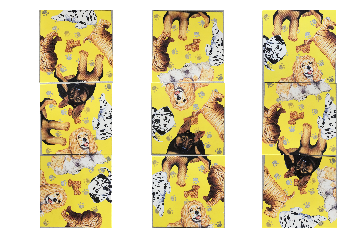

In [133]:
# visualize solution
with open('solved_dog.pickle', 'rb') as f:
    SOLUTION, ORIENTATION = pickle.load(f)
    
f, axarr = plt.subplots(3, 3, gridspec_kw = {'wspace':0, 'hspace':0})
for i in direction:
    im = np.rot90(mpimg.imread('dog'+str(SOLUTION[i])+'.jpg'), -1*ORIENTATION[i])
    axarr[i].imshow(im)
    axarr[i].axis('off')
    axarr[i].set_aspect('equal')

plt.show()

In [112]:
## Function Testing
## check left
SOLUTION = np.zeros([3,3],dtype=int)
ORIENTATION = np.zeros([3,3],dtype=int)
SOLUTION[0,0]=1
ORIENTATION[0,0]=2
location = [0,1]
card = 7
orient = 0

out = card_check(location,card,orient,SOLUTION,ORIENTATION)
print(out)

## check right
SOLUTION = np.zeros([3,3],dtype=int)
ORIENTATION = np.zeros([3,3],dtype=int)
SOLUTION[0,2]=1
ORIENTATION[0,2]=1
location = [0,1]
card = 3
orient = 1

out = card_check(location,card,orient,SOLUTION,ORIENTATION)
print(out)

## check up
SOLUTION = np.zeros([3,3],dtype=int)
ORIENTATION = np.zeros([3,3],dtype=int)
SOLUTION[0,1]=1
ORIENTATION[0,1]=1
location = [1,1]
card = 9
orient = 3

out = card_check(location,card,orient,SOLUTION,ORIENTATION)
print(out)

## check down
SOLUTION = np.zeros([3,3],dtype=int)
ORIENTATION = np.zeros([3,3],dtype=int)
SOLUTION[1,1]=1
ORIENTATION[1,1]=1
location = [0,1]
card = 5
orient = 0

out = card_check(location,card,orient,SOLUTION,ORIENTATION)
print(out)

True
True
True
True
